# SMD Übungszettel Nr.3

__Abagbe von: Pape, Kusurmann, Becker__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
from joblib import Parallel, delayed
import collections

np.random.seed(8)

## Aufgabe 8

In [159]:
def neumann_random(random_numbers_x, random_numbers_y, real_x_values, real_y_values):
    good_number = []
    for i in range(len(real_x_values)):
        possible_u_1_index = np.abs(random_numbers_x - real_x_values[i]) < 1e-3
        possible_u_2_index = random_numbers_y < real_y_values[i]
        valid_numbers = random_numbers_x[(possible_u_1_index == True) & (possible_u_2_index == True)]
       
        good_number.extend(valid_numbers.tolist())

    return np.array(good_number) 

In [154]:
def neumann_random_new(random_x, random_y, number_of_numbers, xmin, xmax, function):
    random_numbers = random_x[random_y <= function(random_x)]
    if len(random_numbers) < number_of_numbers:
        more_random_numbers = []
        garbage_counter = 0
        while len(more_random_numbers) + len(random_numbers) < number_of_numbers:
            xnumber = np.random.uniform(xmin, xmax)
            if len(random_x[random_x == xnumber] != 0):
                print('Doppel Ziehung')
            else:
                ynumber = np.random.uniform()
                if ynumber <= function(xnumber):
                    more_random_numbers.append(xnumber)
                else:
                    garbage_counter += 1
        return np.append(random_numbers, np.array(more_random_numbers)), garbage_counter        
    else:
        return random_numbers, 0 

In [45]:
def planck_distribution(x):
    return 15/np.pi**4 * (x**3) / (np.exp(x) - 1)

Bestimmte Maximum der Planckverteilung:

$$\begin{aligned}
f(x)&=N\frac{x^3}{\exp(x)-1}\\
f'(x)&=N\left(\frac{3x^2(\exp(x)-1)-x^3\exp(x)}{\left(\exp(x)-1\right)^2}\right)\overset{!}{=}0\\
\Rightarrow \quad h(x)&:=\exp(x)(3-x)-3=0
\end{aligned}$$
Verwende die Funktion `brentq`, um die Nullstellen der Funktion $g(x)$ zu bestimmen.

In [4]:
def h(x):
    return np.exp(x) * (3 - x) - 3

In [47]:
xmax_planck =  scipy.optimize.brentq(h, 2, 10)
max_planck = planck_distribution(xmax_planck)
print('Maximum der Planck Verteilung', max_planck)

Maximum der Planck Verteilung 0.21888647009110665


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


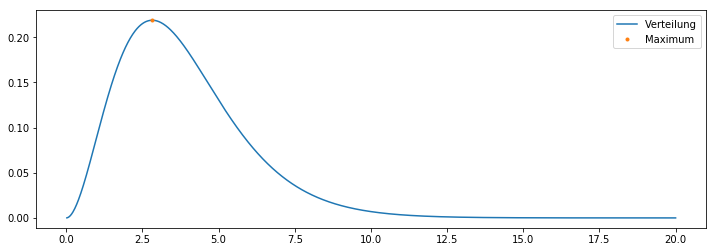

In [48]:
x = np.linspace(0, 20, 1000);
plt.figure(figsize = [12, 4]);
plt.plot(x, planck_distribution(x), label='Verteilung');
plt.plot(xmax_planck, max_planck, '.', label='Maximum');
plt.legend();

Deutlich zu erkennen ist, dass die bestimmte Nullstelle der Funktion $g(x)$ den Maximalwert 
der Planck Verteilung erzeugt.

Eigenschaften der Verteilung:

In [7]:
number_of_numbers = 100000
x_cutoff = 20

In [49]:
x = np.linspace(0, x_cutoff, number_of_numbers/50)

xrandom = np.random.uniform(0, x_cutoff, size=number_of_numbers)
yrandom = np.random.uniform(0, max_planck+1, size=number_of_numbers)
print(len(yrandom))

100000


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [9]:
planck_random = neumann_random(xrandom, yrandom, x, planck_distribution(x));

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


<Figure size 432x288 with 0 Axes>

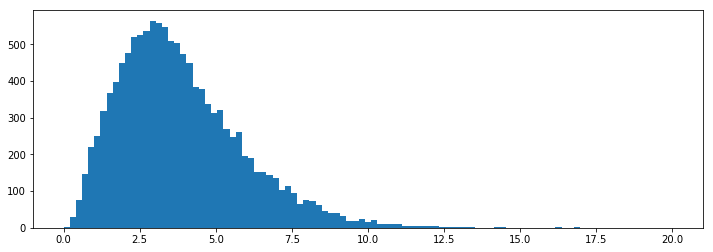

In [146]:
plt.clf()
plt.figure(figsize = [12, 4]);
plt.hist(planck_random, bins=np.linspace(0, x_cutoff, 5 * x_cutoff));

In [153]:
test, garbage = neumann_random_new(xrandom, yrandom, 100000, 0, x_cutoff, planck_distribution)

#plt.hist(neumann_random_new(xrandom, yrandom, 10, planck_distribution), bins=np.linspace(0, x_cutoff, 5 * x_cutoff));

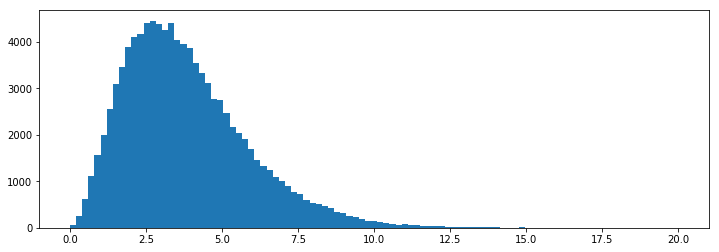

In [156]:
plt.figure(figsize = [12, 4]);
plt.hist(test, np.linspace(0, x_cutoff, 5 * x_cutoff));

### Aufgabenteil b)
Bestimme zunächst den Schnittpunkt der beiden Teilfunktion von $g(x)$:

$$\begin{aligned}
y_\mathrm{max}&=200Nx^{-0.1}\exp(-x^{0,9})\\
0&=200Nx^{-0.1}\exp(-x^{0,9})-y_\mathrm{max}=:t(x)
\end{aligned}$$

Verwende wieder wie oben die Funktion `brentq`, um die Nullstelle zu bestimmen.

In [66]:
def t(x):
    ymax = 0.21888647009110665
    return 200 * 15/np.pi**4 * x**(-0.1) * np.exp(-x**(0.9)) - ymax

In [238]:
x_s = scipy.optimize.brentq(t, 2, 10)
print('x_s liegt bei',x_s)

x_s liegt bei 5.678208598337558


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

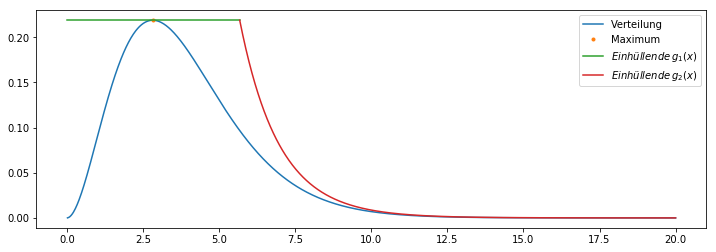

In [68]:
plt.clf()
plt.figure(figsize = [12, 4]);

x = np.linspace(0, 20, 1000);
x_lower = np.linspace(0, x_s, 1000)
x_upper = np.linspace(x_s, x_cutoff, 1000)


plt.plot(x, planck_distribution(x), label='Verteilung');
plt.plot(xmax_planck, max_planck, '.', label='Maximum');
plt.plot(x_lower, np.ones(len(x_lower)) * max_planck, '-', label=r'$Einhüllende \, g_1(x)$');
plt.plot(x_upper, t(x_upper) + max_planck, '-', label=r'$Einhüllende\, g_2(x)$');

plt.legend();

Bestimmte die Transformationsvorschrift, um die gleichverteilten Zufallszahlen in 
$g_2(x)=200Nx^{-0.1}\exp\left(-x^{0.9}\right)$ zu transformieren.Bestimme zunächst die Normierung:

$$\begin{aligned}
1&=\int_{x_s}^{x_ {cutoff}} 200Nx^{-0.1}\exp\left(-x^{0.9}\right)\mathrm{d}x\\
\Leftrightarrow \quad N&=\frac{-2000}{9}\left(\exp\left(-x_{cutoff}^{0.9}\right)-\exp\left(-x_s^{0.9}\right)\right)^{-1}
\end{aligned}$$

Nun die Transformationsvorschrift
$$\begin{aligned}
F(x)&=\frac{2000N}{9}\int_{x_s}^{x} x'^{-0.1}\exp\left(-x'^{0.9}\right)\mathrm{d}x\\
&=-\frac{2000N}{9}\left[\exp\left(-x^{0.9}\right)-\exp\left(-x_s'^{0.9}\right)\right]\overset{!}{=}u\\
\Leftrightarrow \quad T(u):= x &= \left(-\ln\left(\frac{-9u}{2000N}+\exp\left(-x_s^{0.9}\right)\right)\right)^\frac{10}{9}
\end{aligned}$$

In [212]:
def T(u, x_s = 5.678208598337558, x_cutoff = 20):
    N_new = -9/(2000) /(np.exp(-x_cutoff**(0.9))-np.exp(-x_s**(0.9)))
    return (-np.log(-9*u / (2000*N_new) + np.exp(-x_s**(0.9))) )**(10/9)

In [270]:
randomnumbers = np.random.uniform(size=10000)

xrandom_g2 = T(randomnumbers)

testx = T(np.linspace(0,1,1000));

[ 5.6782086   5.67953238  5.68085752  5.68218402  5.68351189  5.68484112
  5.68617172  5.68750369  5.68883704  5.69017177  5.69150787  5.69284536
  5.69418423  5.69552449  5.69686615  5.69820919  5.69955364  5.70089948
  5.70224673  5.70359539  5.70494545  5.70629692  5.70764981  5.70900412
  5.71035985  5.711717    5.71307557  5.71443558  5.71579702  5.71715989
  5.7185242   5.71988996  5.72125715  5.7226258   5.72399589  5.72536744
  5.72674044  5.72811491  5.72949083  5.73086823  5.73224709  5.73362742
  5.73500923  5.73639251  5.73777728  5.73916353  5.74055126  5.74194049
  5.74333121  5.74472343  5.74611715  5.74751237  5.7489091   5.75030734
  5.75170709  5.75310835  5.75451114  5.75591545  5.75732128  5.75872864
  5.76013754  5.76154797  5.76295994  5.76437345  5.76578851  5.76720512
  5.76862328  5.77004299  5.77146427  5.7728871   5.7743115   5.77573748
  5.77716502  5.77859414  5.78002484  5.78145712  5.78289099  5.78432645
  5.7857635   5.78720215  5.7886424   5.79008425  5

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


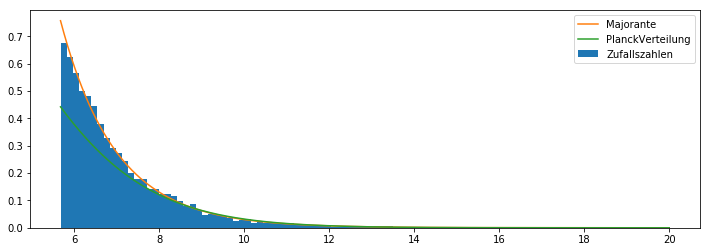

In [275]:
plt.figure(figsize = [12, 4]);
test = np.linspace(x_s, x_cutoff, 2000)
plt.hist(xrandom_g2, bins=np.linspace(x_s, x_cutoff, 100), normed=True, label ='Zufallszahlen');
plt.plot(testx, majoranten_function_g2(testx), label='Majorante')
plt.plot(test, planck_distribution(test)/max_planck, label='PlanckVerteilung');
plt.legend()

Die Transformation schaut gut aus. Deutlich ist zu erkennen, wie die die Zufallsverteilung über der Planck-Verteilung liegt.

In [241]:
T(t(1))

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [279]:
def neumann_majoranten(random_x, random_y, number_of_numbers, majoranten_intervall, majoranten_function, function):
    random_numbers = random_x[random_y <= function(random_x)]
    more_random_numbers = []
    if len(random_numbers) < number_of_numbers:
        garbage_counter = 0
        
        while len(more_random_numbers) + len(random_numbers) < number_of_numbers:
            # majoranten_intervall is a list of tupels
            xintervall = np.random.uniform(majoranten_intervall[0][0], majoranten_intervall[-1][-1])          
            
            for intervall_number in range(len(majoranten_intervall)):
                if xintervall <= majoranten_intervall[intervall_number][-1]:
                    # transform uniform to selected intervall
                    if majoranten_function[intervall_number][0]!= None:
                        x_transformed = majoranten_function[intervall_number][0](np.random.uniform())
                        if len(random_x[random_x == x_transformed])!= 0:
                            print('Doppel Ziehung')
                        else:
                            y_random = np.random.uniform()
                            if y_random < function(x_transformed):
                                more_random_numbers.append(x_transformed)
                            else:
                                garbage_counter += 1
                    else:
                        xnumber = np.random.uniform(majoranten_intervall[intervall_number][0], majoranten_intervall[intervall_number][-1])
                        if len(random_x[random_x == xnumber]) != 0:
                            print('Doppel Ziehung')
                        else:
                            ynumber = np.random.uniform()
                            if ynumber <= function(xnumber):
                                more_random_numbers.append(xnumber)
                            else:
                                garbage_counter += 1
                                     
                            
                            
            
                        
                        
                else:
                    pass 
        return np.append(random_numbers, np.array(more_random_numbers)), garbage_counter
    else:
        return np.append(random_numbers, np.array(more_random_numbers)), 0

In [272]:
def majoranten_function_g2(x):
    N_new = -9/(2000) /(np.exp(-x_cutoff**(0.9))-np.exp(-x_s**(0.9)))
    return 200 * N_new * x**(-0.1) * np.exp(-x**(0.9))

In [280]:
xrandom_g2 = T(randomnumbers, x_s, x_cutoff)
yrandom_g2 = t(xrandom_g2)

majoranten_intervall = [ (0, x_s), (x_s, x_cutoff)]
majoranten_function = [ (None, None), (T, majoranten_function_g2)]

test, garbage = neumann_majoranten(np.array([1]), np.array([1]), 10000, majoranten_intervall, majoranten_function, planck_distribution)

10000 120344
12.16538158236032


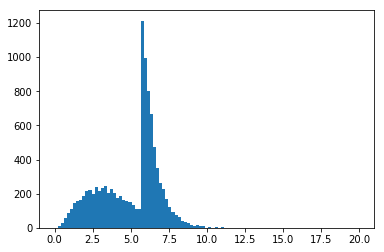

In [281]:
print(len(test), garbage)
print(max(test))
plt.hist(test, bins=np.linspace(0, x_cutoff, 100));

In [175]:
x_1 = np.linspace(0, x_s, number_of_numbers/50)
x_2 = np.linspace(x_s, x_cutoff, number_of_numbers/50)

xrandom_g1 = np.random.uniform(0, x_s, size=number_of_numbers)
yrandom_g1 = np.random.uniform(0, max_planck+1, size=number_of_numbers)


randomnumbers = np.random.uniform(size=number_of_numbers)
xrandom_g2 = T(randomnumbers, x_s, x_cutoff)
yrandom_g2 = t(xrandom_g2)

print(yrandom_g2,planck_distribution(x_2))
randomplanck_g1 = neumann_random(xrandom_g1, yrandom_g1, x_1, planck_distribution(x_1))
randomplanck_g2 = neumann_random(xrandom_g2, yrandom_g2, x_2, planck_distribution(x_2))

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


[-0.08292529 -0.04162382 -0.07294326 ... -0.11646115 -0.01654495
 -0.01037368] [9.67383841e-02 9.64094430e-02 9.60811794e-02 ... 2.57028524e-06
 2.55468174e-06 2.53917199e-06]


In [162]:
print(collections.Counter(randomplanck_g2).most_common(2))
print(collections.Counter(randomplanck_g1).most_common(2))
print(len(randomplanck_g1), len(randomplanck_g2))

[(5.679206686374331, 1), (5.678261663806756, 1)]
[(0.12460818231668007, 1), (0.1537108609784788, 1)]
8382 27875


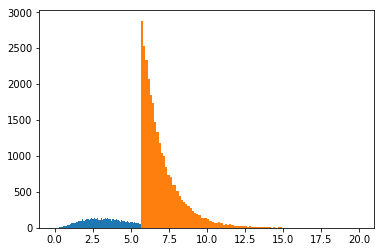

In [163]:
plt.hist(randomplanck_g1, bins=np.linspace(0, x_s, 100));
plt.hist(randomplanck_g2, bins=np.linspace(x_s, x_cutoff, 100));

## Aufgabe 9

In [20]:
def metropolis_algorithmus(x_start, step_size, PDF, length):
    x_sample = [x_start]
    for i in range(length):
        
        x_new = np.random.uniform(x_sample[-1]-step_size, x_sample[-1]+step_size)
        M_ij = min((1, PDF(x_new)/PDF(x_sample[-1]) ))
        
        zeta = np.random.uniform()
        #print('\n', PDF(x_new)/PDF(x_sample[-1]),M_ij,zeta)
        if zeta <= M_ij:
            #print('Angenommen')
            x_sample.append(x_new)
        else:
            #print('Rejected')
            x_sample.append(x_sample[-1])  
    
    return np.array(x_sample)

Generiere nochmal Planck Verteilte Zahlen:

In [21]:
sample_x = metropolis_algorithmus(30, 2, planck_distribution, 1000000)

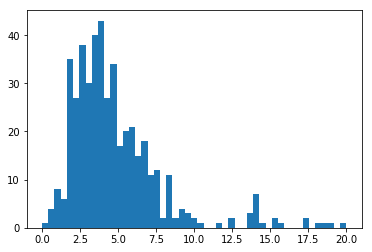

In [22]:
plt.hist(sample_x, bins=np.linspace(0, 20, 50));